In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

# שבוע 10 - SciPy
זוהי ספרייה מדעית (Scientific Python) שנבנתה על בסיס NumPy.  
היא מספקת אוסף רחב של פונקציות מתקדמות לחישובים מתמטיים ונומריים:  
* אינטגרציה וחישוב נגזרות  
* פתרון משוואות דיפרנציאליות  
* אופטימיזציה וחיפוש מינימום/מקסימום  
* אלגברה לינארית מתקדמת (כמו SVD, פירוק LU, QR)  
* עיבוד אותות ותמונות  

SciPy נחשבת לאחת מהספריות המרכזיות בעולם המדעי בפייתון, והיא משלימה את NumPy בכך שהיא מוסיפה פונקציות יישומיות רבות.


### קבועים פיזיקליים
**SciPy** מוסיפה לסביבה של NumPy כלים נומריים מתקדמים: אינטגרציה, פתרון ODEs, אופטימיזציה, אינטרפולציה, FFT, עיבוד אותות, אלגברה ליניארית, סטטיסטיקה ועוד.  
**קבועים פיזיקליים** זמינים ב־`scipy.constants`: למשל $c, h, k_B, G$ וכד'.

In [3]:
# %%
# Constants and quick NumPy recap — EXPANDED
# (Safe to run even if previous cells didn't import constants)
import numpy as np
from scipy import constants
from scipy.constants import physical_constants  # for named constants like Wien's b

# --- Core physical constants (SI units) ---
c   = constants.c               # speed of light (m/s)
h   = constants.h               # Planck constant (J·s)
hbar= constants.hbar            # reduced Planck constant (J·s)
kB  = constants.Boltzmann       # Boltzmann constant (J/K)
e   = constants.e               # elementary charge (C)
eV  = constants.electron_volt   # 1 eV in Joule (J)
NA  = constants.N_A             # Avogadro number (1/mol)
R   = constants.R               # molar gas constant (J/(mol·K))
sigma = constants.Stefan_Boltzmann  # Stefan–Boltzmann constant (W/(m^2·K^4))
epsilon0 = constants.epsilon_0  # vacuum permittivity (F/m)
mu0     = constants.mu_0        # vacuum permeability (N/A^2)
G   = constants.G               # gravitational constant (m^3/(kg·s^2))
g0  = constants.g               # standard gravity (m/s^2)

# Wien's wavelength-displacement constant b ≈ 2.897771955e-3 m·K (via CODATA)
b_wien = physical_constants["Wien wavelength displacement law constant"][0]

# --- Pretty printing helper (engineering/scientific) ---
def fmt(val, unit):
    """Format a number in scientific notation with a unit."""
    return f"{val:.6e} {unit}"

print("Some constants:")
print("  c       =", fmt(c, "m/s"))
print("  h       =", fmt(h, "J·s"))
print("  ħ       =", fmt(hbar, "J·s"))
print("  k_B     =", fmt(kB, "J/K"))
print("  e       =", fmt(e, "C"))
print("  1 eV    =", fmt(eV, "J"))
print("  N_A     =", fmt(NA, "1/mol"))
print("  R       =", fmt(R, "J/(mol·K)"))
print("  σ       =", fmt(sigma, "W/(m^2·K^4)"))
print("  ε0      =", fmt(epsilon0, "F/m"))
print("  μ0      =", fmt(mu0, "N/A^2"))
print("  G       =", fmt(G, "m^3/(kg·s^2)"))
print("  g0      =", fmt(g0, "m/s^2"))
print("  b_Wien  =", fmt(b_wien, "m·K"))


Some constants:
  c       = 2.997925e+08 m/s
  h       = 6.626070e-34 J·s
  ħ       = 1.054572e-34 J·s
  k_B     = 1.380649e-23 J/K
  e       = 1.602177e-19 C
  1 eV    = 1.602177e-19 J
  N_A     = 6.022141e+23 1/mol
  R       = 8.314463e+00 J/(mol·K)
  σ       = 5.670374e-08 W/(m^2·K^4)
  ε0      = 8.854188e-12 F/m
  μ0      = 1.256637e-06 N/A^2
  G       = 6.674300e-11 m^3/(kg·s^2)
  g0      = 9.806650e+00 m/s^2
  b_Wien  = 2.897772e-03 m·K


נדגים שימוש באמצעות מספר דוגמאות broadcasting ווקטוריזציה:

####  1) חישוב אנרגיית פוטון מאורך גל
האור הוא קרינה אלקטרומגנטית, ובתיאור הקוונטי שלו הוא מורכב מחלקיקים הנקראים **פוטונים**. לכל פוטון אנרגיה בדידה, הפרופורציונית לתדירות הגל: $E = h f$ (כאשר $h$ הוא קבוע פלאנק). מאחר שמהירות האור נקבעת על־ידי $c = \lambda f$, מתקבל הקשר השימושי  

$E = \dfrac{h c}{\lambda}$.  

אורך גל קצר יותר (כחול/על־סגול) משמעו אנרגיה גדולה יותר, ואורך גל ארוך יותר (אדום/תת־אדום) משמעו אנרגיה קטנה יותר — עיקרון שמסביר תופעות כמו בליעה/פליטה ספקטרלית, יעילות תאים סולאריים ורגישות הראייה.

בדוגמה יצרנו וקטור של אורכי גל אופייניים בתחום הנראה (ננומטר), המרנו למטרים, וחישבנו את $E$ לכל ערך — בבת אחת — באמצעות וקטוריזציה של NumPy (כלומר בלי לולאות מפורשות). לבסוף ביצענו המרות יחידות: מג'ול ל־eV בעזרת $1\ \mathrm{eV}$ במונחי ג'ול מתוך `scipy.constants`. כך מקבלים אינטואיציה: ככל שאורך הגל קצר יותר ($\lambda$ קטן), האנרגיה גדולה יותר.


In [4]:
# 1) Photon energy from wavelength: E = h*c/λ (vectorized over λ)
wavelength_nm = np.array([400, 500, 600, 700])           # nm
wavelength_m  = wavelength_nm * 1e-9                      # convert to meters
E_J = h * c / wavelength_m                                # Joule
E_eV = E_J / eV                                           # electron-volt
print("\nPhoton energy for visible wavelengths:")
for lam, Ej, Ev in zip(wavelength_nm, E_J, E_eV):
    print(f"  λ = {lam:>3.0f} nm  ->  E = {Ej:8.3e} J  = {Ev:7.3f} eV")


Photon energy for visible wavelengths:
  λ = 400 nm  ->  E = 4.966e-19 J  =   3.100 eV
  λ = 500 nm  ->  E = 3.973e-19 J  =   2.480 eV
  λ = 600 nm  ->  E = 3.311e-19 J  =   2.066 eV
  λ = 700 nm  ->  E = 2.838e-19 J  =   1.771 eV


#### 2) סקאלת אנרגיה תרמית $k_B T$ ומתיחות תרמית במתח
במערכות פיזיקליות בטמפרטורה סופית, החלקיקים אינם נחים אלא נעים באנרגיות אקראיות הנובעות מחום. קנה־המידה הטבעי לאנרגיה תרמית הוא $k_B T$, כאשר $k_B$ הוא קבוע בולצמן ו־$T$ היא הטמפרטורה בקלווין. גודל זה מייצג את האנרגיה הממוצעת של תנודות תרמיות, ומשמש בהבנת תופעות כמו הולכה חשמלית, דיפוזיה ותהליכים סטטיסטיים.  
באלקטרוניקה מקובל להמיר את האנרגיה התרמית למתח אופייני באמצעות $V_T = \tfrac{k_B T}{e}$, כאשר $e$ הוא מטען האלקטרון. מתח זה מהווה קנה־מידה חשוב לקביעת התנהגות של דיודות, טרנזיסטורים ורכיבים מוליכים למחצה, ובטמפרטורת חדר ערכו קרוב ל־$25\ \mathrm{mV}$.


בדוגמה זו חישבנו עבור מספר טמפרטורות אופייניות את $k_B T$ — סדר־גודל האנרגיות החום־תרמיות במערכת. המרה ל־eV מקלה על ההשוואה לפיזיקה של אלקטרונים ומוליכים למחצה. בנוסף חישבנו את ה״מתח התרמי״ $V_T = \dfrac{k_B T}{e}$, קנה־מידה חשוב באלקטרוניקה (כ־$25$–$26\ \mathrm{mV}$ בטמפרטורת חדר). שוב, הכל נעשה על מערך של $T$ים בבת אחת (וקטוריזציה).



In [5]:
# 2) Thermal energy scale: k_B T and thermal voltage (k_B T / e) at a few temperatures
T = np.array([77, 300, 600, 1000])                        # K (LN2, room, hot, very hot)
kT_J = kB * T
kT_eV = kT_J / eV
thermal_voltage = kT_J / e                                # Volts
print("\nThermal scales (vectorized over T):")
for Ti, kTJ, kTe, Vt in zip(T, kT_J, kT_eV, thermal_voltage):
    print(f"  T = {Ti:>4.0f} K  ->  k_B T = {kTJ:.3e} J = {kTe:.4f} eV,  k_B T / e = {Vt*1e3:.2f} mV")


Thermal scales (vectorized over T):
  T =   77 K  ->  k_B T = 1.063e-21 J = 0.0066 eV,  k_B T / e = 6.64 mV
  T =  300 K  ->  k_B T = 4.142e-21 J = 0.0259 eV,  k_B T / e = 25.85 mV
  T =  600 K  ->  k_B T = 8.284e-21 J = 0.0517 eV,  k_B T / e = 51.70 mV
  T = 1000 K  ->  k_B T = 1.381e-20 J = 0.0862 eV,  k_B T / e = 86.17 mV


#### 3) דוגמת Broadcasting: אנרגיה פוטנציאלית כבידתית
במערכת מכנית פשוטה, אנרגיה פוטנציאלית נגרמת מכוח הכבידה הפועל על מסה $m$ בגובה $h$ מעל נקודת ייחוס: $U = m g h$, כאשר $g$ הוא תאוצת הכובד (כ־$9.8\ \mathrm{m/s^2}$ על פני כדור הארץ). קשר זה חשוב להבנת תהליכים יומיומיים כמו נפילת עצמים, עבודה מכנית והמרת אנרגיה במערכות פיזיקליות. במודלים מתקדמים יותר, עקרון זה מהווה בסיס לחישוב שדות כבידה ולחוקי שימור אנרגיה.

רצינו את האנרגיה $U = m g h$ לכל צירוף של כמה מסות וכמה גבהים. שימוש ב־**Broadcasting** מאפשר לחשב מטריצה $U$ במכה אחת: ממד המסות כעמודות והגבהים כשורות (או להפך) באמצעות הוספת מימד חדש (`masses[:, None]` ו־`heights[None, :]`). זו פרקטיקה חשובה לעבודה יעילה עם טבלאות/סריגים בלי לולאות.


In [6]:
# 3) Broadcasting example: Gravitational potential energy U = m * g0 * h
#    masses shape (3,), heights shape (4,) -> U shape (3,4) via broadcasting
masses = np.array([0.2, 1.0, 5.0])                        # kg
heights = np.array([0.5, 1.0, 2.0, 10.0])                 # m
U = masses[:, None] * g0 * heights[None, :]               # J, shape (3,4)
print("\nGravitational potential energy matrix U[mass, height] = m * g0 * h (J):")
print(U)


Gravitational potential energy matrix U[mass, height] = m * g0 * h (J):
[[  0.980665   1.96133    3.92266   19.6133  ]
 [  4.903325   9.80665   19.6133    98.0665  ]
 [ 24.516625  49.03325   98.0665   490.3325  ]]


#### 4) חוק וין: אורך גל שיא של גוף שחור
בפיזיקה של תרמודינמיקה וקרינה, **גוף שחור** הוא מודל אידיאלי שקולט את כל הקרינה הפוגעת בו ופולט קרינה אלקטרומגנטית בהתאם לטמפרטורתו בלבד. ספקטרום הפליטה מתואר על־ידי חוק פלאנק, אך מיקום השיא בספקטרום נקבע על־פי **חוק וין להזחת השיא**:  
$\lambda_{\max} = \dfrac{b}{T}$,  
כאשר $b$ הוא קבוע וין ו־$T$ היא הטמפרטורה בקלווין. החוק מראה שככל שהטמפרטורה גבוהה יותר, אורך הגל של השיא קטן יותר — ולכן עצמים חמים פולטים קרינה בתחומי אור קצרים (כחול/על־סגול), בעוד שעצמים קרים יותר פולטים בעיקר באורכי גל ארוכים (אינפרה־אדום). עיקרון זה מסביר את צבעי הכוכבים ואת שיטות למדידת טמפרטורה באמצעות קרינה.

חוק וין קובע $\lambda_{\max} = \dfrac{b}{T}$ עם קבוע $b$ שנשלף מ־`physical_constants`. חישבנו את $\lambda_{\max}$ עבור כמה טמפרטורות (חדר, נורת להט, שמש) והמרנו לננומטר לקבלת תחושת סדרי גודל. הדוגמה מראה כיצד לשלב קבועים סטנדרטיים עם חישובים וקטוריים — ובמקביל לחזק אינטואיציה: ככל שהטמפרטורה גבוהה יותר, שיא הקרינה מוסת לכיוון אורכי גל קצרים יותר.



In [7]:
# 4) Blackbody peak wavelength via Wien's law: λ_max = b / T (vectorized)
T_bb = np.array([300, 1000, 3000, 5800])                  # K (room, hot, incandescent-ish, Sun ~5800 K)
lambda_max_m = b_wien / T_bb
lambda_max_nm = lambda_max_m * 1e9
print("\nBlackbody peak wavelength (Wien's law):")
for Ti, lam_m, lam_nm in zip(T_bb, lambda_max_m, lambda_max_nm):
    print(f"  T = {Ti:>4.0f} K  ->  λ_max ≈ {lam_m:.3e} m  (~{lam_nm:.0f} nm)")


Blackbody peak wavelength (Wien's law):
  T =  300 K  ->  λ_max ≈ 9.659e-06 m  (~9659 nm)
  T = 1000 K  ->  λ_max ≈ 2.898e-06 m  (~2898 nm)
  T = 3000 K  ->  λ_max ≈ 9.659e-07 m  (~966 nm)
  T = 5800 K  ->  λ_max ≈ 4.996e-07 m  (~500 nm)


### 5) הקדמה קצרה: מהירות האור וקבועי היסוד באלקטרומגנטיות  
באלקטרודינמיקה קלאסית (EMT), מהירות התפשטות של גלי אלקטרומגנטיים בוואקום אינה רק גודל ניסיוני אלא נובעת ישירות מקבועי היסוד:  
$c = \dfrac{1}{\sqrt{\varepsilon_0 \mu_0}}$,  
כאשר $\varepsilon_0$ הוא המקדם הדיאלקטרי של הריק (permitivity) ו־$\mu_0$ הוא המקדם המגנטי של הריק (permeability). קשר זה מדגים כיצד תכונות הוואקום מכתיבות את מהירות האור, ומהווה דוגמה מרתקת לאחדות של חשמל, מגנטיות וקרינה. מעבר לערך עצמו, בדיקה כזו חשובה לאימות עקביות יחידות וחישובים כשעובדים עם קבועים מספריים ממקורות שונים.

ב־EMT ידוע שבוואקום $c = \dfrac{1}{\sqrt{\varepsilon_0 \mu_0}}$. בדוגמה חישבנו את הצד הימני מקבועים פיזיקליים והשווינו למהירות האור `constants.c`. חישוב **שגיאה יחסית** קטן מאשש עקביות יחידות וערכים, ומהווה בדיקת־שפיות שימושית כשעובדים עם קבועים ממקורות שונים.


In [8]:
# 5) Quick sanity check: c ≈ 1/sqrt(ε0 * μ0)
c_from_eps_mu = 1.0 / np.sqrt(epsilon0 * mu0)
rel_err = abs(c_from_eps_mu - c) / c
print("\nSanity check: c vs 1/sqrt(ε0 μ0)")
print(f"  c_from_eps_mu = {c_from_eps_mu:.6e} m/s")
print(f"  relative error = {rel_err:.3e}")


Sanity check: c vs 1/sqrt(ε0 μ0)
  c_from_eps_mu = 2.997925e+08 m/s
  relative error = 5.967e-13


In [9]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "הקוד הבא עושה שימוש בקבועים מתוך scipy.constants:<br><br>from scipy import constants<br>c = constants.c  # מהירות האור (m/s)<br>h = constants.h  # קבוע פלאנק (J·s)<br>kB = constants.Boltzmann  # קבוע בולצמן (J/K)<br><br>מהי התכונה המרכזית של הקבועים הללו וכיצד נשתמש בהם נכון?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "הקבועים מוגדרים ביחידות SI מדויקות לפי CODATA וניתנים לשימוש ישיר בחישובים פיזיקליים",
      "correct": true,
      "feedback": "נכון! scipy.constants מספק ערכים עדכניים ביחידות SI תקניות לשימוש מיידי."
    },
    {
      "answer": "הקבועים ניתנים רק ביחידות לא־SI ויש להמיר אותם תמיד באופן ידני",
      "correct": false,
      "feedback": "לא נכון — כברירת מחדל הקבועים ניתנים ביחידות SI. המרה נדרשת רק אם רוצים יחידות אחרות."
    },
    {
      "answer": "הקבועים משתנים בין ריצות ולכן אינם מתאימים לחישובים מדויקים",
      "correct": false,
      "feedback": "ממש לא — הערכים קבועים ואחידים לפי ההגדרות הפיזיקליות המקובלות."
    },
    {
      "answer": "הקבועים זמינים ב-numpy אך לא ב-scipy",
      "correct": false,
      "feedback": "לא נכון — numpy לא כולל קבועים פיזיקליים; רק scipy.constants מספק אותם."
    }
  ]
}]
'''
myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## 2. אינטגרציה וגזירה נומרית + ODEs
בפיזיקה ומתמטיקה רבות מהבעיות אינן ניתנות לפתרון אנליטי פשוט, ולכן יש צורך להעריך את הפתרונות באופן נומרי באמצעות קירובים חישוביים.

### אינטגרציה נומרית
המטרה היא להעריך שטח מתחת לפונקציה:

$$
I = \int_a^b f(x)\,dx
$$

![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Integral_example.svg/330px-Integral_example.svg.png)

- **שיטות מדויקות:**  
  `scipy.integrate.quad` משתמשת באינטגרציה אדפטיבית:  
  1) מתחילים בקטע $[a,b]$ ובודקים אותו עם מעט נקודות. על בסיס אותן נקודות מחשבים שתי הערכות לשטח: אחת גסה ואחת מדויקת יותר (Gauss–Kronrod).  
  2) ההפרש בין שתי ההערכות הוא אומדן השגיאה.  
  3) אם השגיאה קטנה מהסף שנקבע — מקבלים את תרומת הקטע. אם לא — מחלקים את הקטע לשניים ודוגמים יותר באזור הבעייתי.  
  4) חוזרים על התהליך עד שכל התת־קטעים עומדים בדרישת הדיוק (או עד שמגיעים למגבלת החלוקות).


  שיטה זו מתאימה גם לגבולות אינסופיים ($\pm\infty$) ע"י מיפוי לתחום סופי. אם יש נקודות בעייתיות באמצע ניתן לסמן זאת בפונקציה על ידי `points=[...]`.
  
- **שיטות נומריות פשוטות:**  
  כלל הטרפזים `numpy.trapz`:  
  שיטת הטרפזים היא אחת השיטות הנומריות הפשוטות ביותר לקירוב אינטגרלים מסוימים.  
  במקום לחשב את השטח המדויק מתחת לעקומה, נחלק את הקטע ל־$N$ תתי־קטעים שווים, ובכל תת־קטע נקרב את הפונקציה בקו ישר בין נקודות הקצה. כך מתקבלים **טרפזים** שהשטח שלהם קל לחישוב.

  ![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlxd8SDZkdn2zfQZFnd7tds9i3gaWWFYMZYw&s)

  הנוסחה הכללית:  

  $$
  \int_a^b f(x)\,dx \;\approx\; \dfrac{h}{2}\Big[ f(x_0) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{N-1}) + f(x_N) \Big]
  $$ 

  כאשר $h = \dfrac{b-a}{N}$ הוא רוחב כל תת־קטע, ו־$x_i = a + i h$.  
  
  ```{note}
  הספרייה מספקת פונקציה נוספת לחשוב אינטגרל מצטבר בשיטת הטרפזים : `scipy.integrate.cumtrapz` 
  `cumtrapz` מחשבת את האינטגרל המצטבר: עבור קבוצת נקודות $x_0<\dots<x_N$ וקבוצת ערכים $y_i\approx f(x_i)$ מתקבל רצף שטחים  
  $A_k \approx \int_{x_0}^{x_k} f(x)\,dx$ לכל $k$.  

  - בניגוד ל-`numpy.trapz` שמחזירה **ערך יחיד** (האינטגרל הכולל על $[a,b]$), `cumtrapz` מחזירה **מערך** של הערכים המצטברים לכל נקודה.  
  - שיטה זו שימושית כאשר רוצים את האינטגרל עד כל נקודה ולא רק את הסכום הכולל, כלומר לקבל עקומה מצטברת: 
    לכל $x_k$ מתקבל $A_k \approx \int_{x_0}^{x_k} f(x)\,dx$. 
    דוגמאות: להפוך PDF ל־CDF; לחשב מרחק מצטבר מתוך מהירות $v(t)$.
  ```

`````{admonition} מדוע יש מספר שיטות אינטגרציה?
:class: tip
כדי להמחיש, נבחן אינטגרל עם גבול אינסופי:

$$
\int_{0}^{\infty} e^{-x}\,dx = 1.
$$

**עם `quad` (אדפטיבי):**  
- אפשר לכתוב ישירות גבולות אינסופיים (`0, np.inf`).  
- האלגוריתם ממפה לתחום סופי, בוחר נקודות דגימה לפי שגיאה, ומחזיר ערך ואומדן שגיאה.

**עם כלל הטרפזים (`trapz`/`cumtrapz`):**  
- חייבים לעבוד על קטע סופי: בוחרים $L$ ומחשבים על $[0,L]$.  
- מנהלים שתי שגיאות:  
  1) קיטום הזנב $[L,\infty)$ (למשל עבור $e^{-x}$, בחירה $L \approx 10$ נותנת קיטום $\approx e^{-10}$).  
  2) דיסקרטיזציה של הרשת (מגדילים $N$ או מצופפים את $x$).  
- מגדילים את $L$ ומצופפים את הרשת עד שהערך מתייצב בתוך הסף הרצוי.
`````

להלן דוגמת שימוש בפונקציות אינטגרציה של SciPy שממחישה את ההבדל ואת טיב הקירוב:


In [10]:
# %%
# SciPy-only integration demo: quad (improper integral) vs trapezoid (finite interval)
import numpy as np
from scipy import integrate, special

# Target integrand and exact value on [0, ∞)
f = lambda x: np.exp(-x**2)          # Gaussian
I_exact = np.sqrt(np.pi)/2           # integral_0^∞ e^{-x^2} dx

# 1) quad can handle the infinite limit directly
I_quad, err_quad = integrate.quad(f, 0, np.inf)

print("Exact               =", I_exact)
print("quad (0..∞)         =", I_quad, "   | est. abs error ~", err_quad)
print("abs error (quad)    =", abs(I_quad - I_exact))
print("-"*60)

# 2) trapezoid must approximate [0, ∞) by [0, L] and a finite grid
Ls = [2, 3, 4, 6]         # cutoff values
Ns = [200, 1000, 5000]    # number of grid points

for L in Ls:
    for N in Ns:
        xs = np.linspace(0, L, N)                 # finite grid
        I_trap = integrate.trapezoid(f(xs), xs)   # SciPy's trapezoid (not NumPy)
        # Add tail estimate via complementary error function: ∫_L^∞ e^{-x^2} dx = (√π/2) erfc(L)
        tail = (np.sqrt(np.pi)/2) * special.erfc(L)
        I_trap_tail = I_trap + tail               # corrected trapezoid with tail
        print(f"L={L:<2}  N={N:<5} | trap={I_trap:.8f}  + tail={tail:.3e}  -> trap+tail={I_trap_tail:.8f}  | abs err={abs(I_trap_tail - I_exact):.2e}")
    print("-"*60)


Exact               = 0.8862269254527579
quad (0..∞)         = 0.8862269254527579    | est. abs error ~ 7.10131839047246e-09
abs error (quad)    = 0.0
------------------------------------------------------------
L=2   N=200   | trap=0.88208077  + tail=4.146e-03  -> trap+tail=0.88622631  | abs err=6.17e-07
L=2   N=1000  | trap=0.88208137  + tail=4.146e-03  -> trap+tail=0.88622690  | abs err=2.45e-08
L=2   N=5000  | trap=0.88208139  + tail=4.146e-03  -> trap+tail=0.88622692  | abs err=9.77e-10
------------------------------------------------------------
L=3   N=200   | trap=0.88620733  + tail=1.958e-05  -> trap+tail=0.88622691  | abs err=1.40e-08
L=3   N=1000  | trap=0.88620735  + tail=1.958e-05  -> trap+tail=0.88622692  | abs err=5.56e-10
L=3   N=5000  | trap=0.88620735  + tail=1.958e-05  -> trap+tail=0.88622693  | abs err=2.22e-11
------------------------------------------------------------
L=4   N=200   | trap=0.88622691  + tail=1.366e-08  -> trap+tail=0.88622693  | abs err=3.03e-11
L

#### ניתוח תוצאות

- `quad` נותנת תוצאה מדויקת מאוד ישירות על $[0,\infty)$, עם הערכת שגיאה פנימית.  
- `trapezoid` לבדו על $[0,L]$ יחמיץ את הזנב ($x > L$). שיפור פשוט הוא להוסיף תיקון זנב אנליטי:  

  $$
  \int_L^\infty e^{-x^2}\,dx \;=\; \tfrac{\sqrt{\pi}}{2}\,\mathrm{erfc}(L),
  $$

  ואז השגיאה תלויה בעיקר בצפיפות הרשת ובבחירת $L$.  
- הגדלת $L$ ו־$N$ משפרת את הדיוק, אך העלות החישובית גדלה — זו בדיוק התועלת של `quad` בשילוב גבולות אינסופיים.

`````{admonition} באיזו שיטה נבחר?
:class :tip
**נבחר ב־`quad` כאשר:**
- יש לנו פונקציה \(f(x)\) שניתן לקרוא לה (לא רק דגימות).
- נדרש ערך בודד עם אומדן שגיאה ודיוק נשלט (`epsabs/epsrel`).
- יש גבולות אינסופיים  ($\pm\infty$) או נקודות בעייתיות ידועות (`points=[...]`).

**נבחר בכלל הטרפזים (`trapz`/`cumtrapz`) כאשר:**
- יש לנו דגימות \(x,y\) (מדידה/סימולציה על רשת).
- רוצים עקומה מצטברת בקלות (`cumtrapz`) או הרבה אינטגרלים על אותם נתונים.
- הנתונים רועשים וצריך שיטה פשוטה ויציבה.
`````

### נגזרות ומשוואות דיפרנציאליות רגילות (ODEs)
במקרים רבים אנו מתעניינים בהתפתחות בזמן של מערכת, המתוארת על ידי ODE:

$$
\frac{d\mathbf{y}}{dt} = f(t,\mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y}_0
$$

כלומר, הנגזרת של המשתנה $\mathbf{y}$ תלויה בזמן ובערכו הנוכחי.  
כדי לפתור, משתמשים בפונקציה `scipy.integrate.solve_ivp`, שמבצעת אינטגרציה נומרית לאורך הזמן.

### דוגמה: מתנד הרמוני
המשוואה של מתנד הרמוני פשוט היא:

$$
\ddot{x} + \omega^2 x = 0
$$

שניתן לרשום כמערכת של שתי משוואות מסדר ראשון:

$$
\begin{aligned}
\dot{x} &= v \\
\dot{v} &= -\omega^2 x
\end{aligned}
$$

כך אפשר לייצג את המצב כוקטור $\mathbf{y} = [x,v]$ ולפתור נומרית באמצעות `solve_ivp`.

![Alt text](https://upload.wikimedia.org/wikipedia/commons/7/74/Simple_harmonic_motion_animation.gif)

נפתור נומרית את משוואת המתנד ההרמוני הפשוט

$$
\ddot{x} + \omega^2 x = 0,
$$

על ידי פירוקה למערכת מסדר ראשון:

$$
\dot{x}=v,\qquad \dot{v}=-\omega^2 x.
$$

נשתמש ב־`scipy.integrate.solve_ivp` כדי לבצע אינטגרציה בזמן, נשווה לפתרון האנליטי

$$ 
x(t)=A\cos(\omega t)+B\sin(\omega t)
$$

(בעת אתחול $x(0)=1,\ v(0)=0$ נקבל $x(t)=\cos(\omega t)$),
ונבדוק שימור אנרגיה:

$$
E(t)=\tfrac{1}{2}\,m v(t)^2+\tfrac{1}{2}\,k x(t)^2
=\tfrac{1}{2}\,v(t)^2+\tfrac{1}{2}\,\omega^2 x(t)^2
$$

(עבור $m=1,\ k=\omega^2$). נציג גם דיוק (שגיאת עקבה) ודיון קצר על פרמטרי הדיוק

ראשית נייבא ספריות ונגדיר קבועים:
- $\omega$ מגדיר את תדר המתנד 
- $t$ את תחום הזמן לפתרון  
- תנאי ההתחלה $\mathbf{y}(0)=[x(0),v(0)]=[1,0]$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

w = 2*np.pi            # natural frequency [rad/s]
t_span = (0.0, 2.0)    # simulation window [s]
y0 = [1.0, 0.0]        # initial state: x(0)=1, v(0)=0

נגדיר את הפונקציה $f(t,\mathbf{y})$ כך ש־$\mathbf{y}=[x,v]$ ו־$\dot{\mathbf{y}}=[v,\,-\omega^2 x]$.  זהו הייצוג הסטנדרטי ל־`solve_ivp`.


In [12]:
def sho(t, y):
    # y = [x, v]
    x, v = y
    return [v, -w**2 * x]


נפעיל את `solve_ivp` עם סבילות יחסית/מוחלטת ($rtol, atol$) לקבלת פתרון מדויק וחלק. `dense_output=True` מאפשר להעריך את $\mathbf{y}(t)$ בכל $t$ מבוקש דרך `sol.sol(t)`.

נגדיר רשת זמן אחידה, ונחלץ את $x(t)$ ו־$v(t)$ הנומריים.

```{note}
ב־`scipy.integrate.solve_ivp` אפשר לבחור את שיטת האינטגרציה דרך הפרמטר `method`.

- **`RK45`** היא ברירת המחדל:  
  מדובר באלגוריתם **Runge–Kutta מסדר 5** עם בקרה פנימית על השגיאה בעזרת אומדן מסדר 4.  
  זהו בעצם האלגוריתם של **Dormand–Prince (1980)** — גרסה יעילה במיוחד של Runge–Kutta.

- **מה זה נותן בפועל?**  
  - צעד בכל אינטגרציה מחשב גם הערכת מסדר 5 וגם הערכת מסדר 4.  
  - ההפרש ביניהן נותן אומדן שגיאה, שבעזרתו הפותר מתאים את גודל הצעד הבא (adaptive step size).  
  - כך מתקבל איזון טוב בין דיוק למהירות.

- **שימוש נפוץ:**  
  מתאים לרוב הבעיות הלא־קשיחות (non-stiff ODEs), ולכן משמש כשיטה ברירת מחדל ב־SciPy.
```


In [13]:
rtol = 1e-9
atol = 1e-12

sol = integrate.solve_ivp(
    sho, t_span, y0,
    method="RK45",        # Dormand–Prince explicit RK
    dense_output=True,    # enables sol.sol(t) evaluation
    rtol=rtol, atol=atol,
    max_step=0.01         # optional: finer dense output
)

t = np.linspace(*t_span, 800)
xy = sol.sol(t)          # evaluate dense solution
x_num = xy[0]
v_num = xy[1]


עבור תנאי ההתחלה שנבחרו מתקבל פתרון אנליטי $x(t)=\cos(\omega t)$, $v(t)=-\omega\sin(\omega t)$.  
נחשב את שגיאת המיקום $x_{\text{num}}-x_{\text{ana}}$ לאורך הזמן לבדיקת הדיוק.


In [14]:
x_ana = np.cos(w*t)
v_ana = -w*np.sin(w*t)
err_x = x_num - x_ana    


נחשב את האנרגיה $E(t)=\tfrac{1}{2}v^2+\tfrac{1}{2}\omega^2 x^2$ (עם $m=1,\ k=\omega^2$).  
נבדוק **סטיית אנרגיה יחסית** $(E-E_0)/E_0$ כדי לוודא שהפתרון יציב ונאמן לדינמיקה השמרנית.


In [15]:
E = 0.5*v_num**2 + 0.5*(w**2)*x_num**2   # m=1, k=ω^2
E0 = E[0]
rel_energy_drift = (E - E0)/E0


ניצור 4 תתי־תרשימים:  
  1) $x(t)$ נומרי מול אנליטי — לבדיקת חפיפה ודיוק.  
  2) גרף פאזה $v$ מול $x$ — מציג מסלול אליפטי אופייני למתנד הרמוני.  
  3) אנרגיה $E(t)$ וקו $E(0)$ — לבדיקת שימור אנרגיה נומרית.  
  4) שגיאת מיקום — מציג את גודל ההפרש בין נומרי לאנליטי לאורך הזמן.

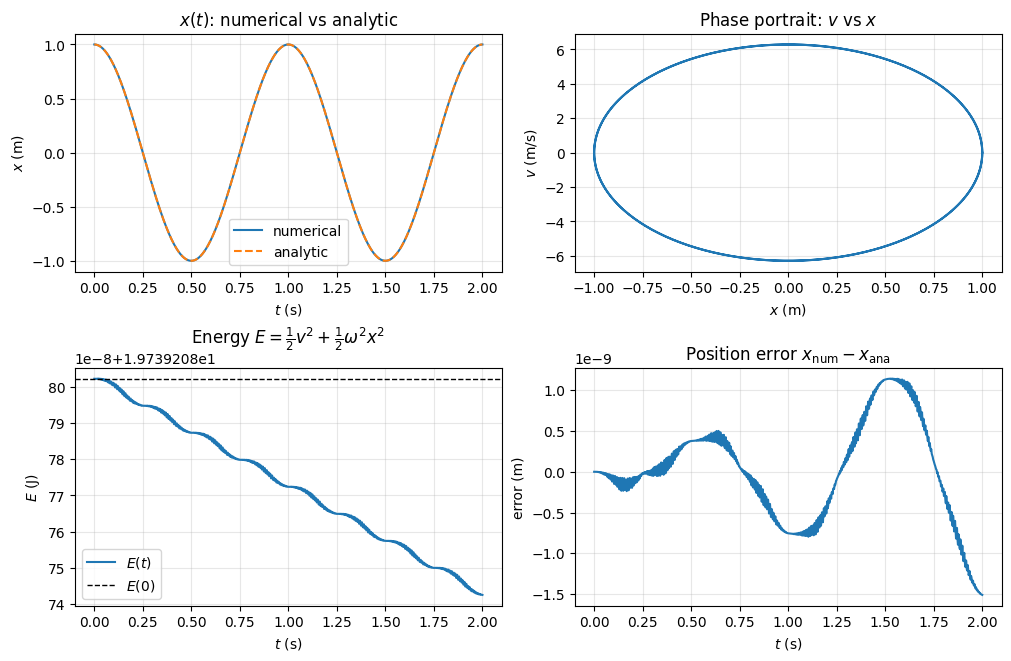

In [16]:

fig, axs = plt.subplots(2, 2, figsize=(10, 6.5), constrained_layout=True)

# (1) x(t): numerical vs analytical
axs[0,0].plot(t, x_num, label="numerical")
axs[0,0].plot(t, x_ana, "--", label="analytic")
axs[0,0].set_title(r"$x(t)$: numerical vs analytic")
axs[0,0].set_xlabel(r"$t$ (s)"); axs[0,0].set_ylabel(r"$x$ (m)")
axs[0,0].legend(); axs[0,0].grid(True, alpha=0.3)

# (2) phase portrait v(x)
axs[0,1].plot(x_num, v_num)
axs[0,1].set_title(r"Phase portrait: $v$ vs $x$")
axs[0,1].set_xlabel(r"$x$ (m)"); axs[0,1].set_ylabel(r"$v$ (m/s)")
axs[0,1].grid(True, alpha=0.3)

# (3) E(t)
axs[1,0].plot(t, E, label=r"$E(t)$")
axs[1,0].axhline(E0, color="k", ls="--", lw=1, label=r"$E(0)$")
axs[1,0].set_title(r"Energy $E = \frac{1}{2} v^2 + \frac{1}{2} \omega^2 x^2$")
axs[1,0].set_xlabel(r"$t$ (s)"); axs[1,0].set_ylabel(r"$E$ (J)")
axs[1,0].legend(); axs[1,0].grid(True, alpha=0.3)

# (4) Position error
axs[1,1].plot(t, err_x)
axs[1,1].set_title(r"Position error $x_{\rm num}-x_{\rm ana}$")
axs[1,1].set_xlabel(r"$t$ (s)"); axs[1,1].set_ylabel(r"error (m)")
axs[1,1].grid(True, alpha=0.3)

plt.show()


`````{admonition} מה רואים בתוצאות?
:class :tip

- **השוואה אנליטי–נומרי:** העקומות של $x(t)$ כמעט חופפות (הפרש קטן מאוד). זה מצביע על דיוק גבוה של `solve_ivp` בהגדרות $rtol, atol$ שנבחרו.  
- **גרף פאזה (Phase portrait):** הגרף של $v$ מול $x$ הוא אליפסה (למעשה מעגל בסקלות מתאימות), כצפוי למתנד הרמוני שבו האנרגיה מחולקת בין תנועה (קינטית) וקפיץ (פוטנציאלית).  
- **אנרגיה:** $E(t)=\tfrac{1}{2}v^2+\tfrac{1}{2}\omega^2x^2$ נשמרת כמעט קבועה (סטיות זעירות מקורן בשגיאות עיגול/אינטגרציה).  
- **שגיאת מיקום:** ההפרש $x_{\rm num}-x_{\rm ana}$ זעיר לאורך כל התחום (שימו לב לסקאלה בצירה הy). אם מקשיחים את הדרישות (למשל מפחיתים $rtol, atol$ עוד), ניתן להקטין את השגיאה על חשבון זמן ריצה.
`````

נדפיס נתוני ביצוע: זמן סופי, מספר הצעדים שננקטו, שגיאת מיקום מקסימלית וסטיית אנרגיה יחסית מירבית — סיכום מהיר לאיכות הפתרון.

In [17]:
print(f"Final time reached: t = {sol.t[-1]:.3f} s, steps taken: {len(sol.t)}")
print(f"Max |x error| over grid: {np.max(np.abs(err_x)):.2e}")
print(f"Relative energy drift (max): {np.max(np.abs(rel_energy_drift)):.2e}")

Final time reached: t = 2.000 s, steps taken: 256
Max |x error| over grid: 1.51e-09
Relative energy drift (max): 3.02e-09


`````{admonition} כללי אצבע
:class :tip

- אפשר לשנות שיטת אינטגרציה דרך `method` (למשל `"DOP853"`, `"Radau"` לבעיות קשיחות).  
- הגדלת הדיוק (`rtol`, `atol`) או הקטנת `max_step` תקטין שגיאות – אך תגדיל את מספר הצעדים וזמן החישוב.  
- עבור בדיקות אימות, השוואה לפתרון אנליטי (כאשר קיים) ולמעקב אחר אנרגיה הם כלים יעילים לגילוי בעיות בדיוק/יציבות.
`````

In [18]:
import json
from jupyterquiz import display_quiz
from IPython.display import Javascript, display

quiz_json = r'''
[
  {
    "question": "איזו פונקציה מתאימה לחישוב אינטגרל עם גבול אינסופי מהצורה $\\int_0^{\\infty} e^{-x^2}\\,dx$?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>numpy.trapz</code>",
        "correct": false,
        "feedback": "לא נכון — trapz פועל על קטע סופי עם רשת נקודות נתונה."
      },
      {
        "answer": "<code>integrate.quad</code>",
        "correct": true,
        "feedback": "נכון! integrate.quad יודע לטפל גם באינטגרלים עם גבול אינסופי."
      },
      {
        "answer": "<code>integrate.solve_ivp</code>",
        "correct": false,
        "feedback": "לא נכון — solve_ivp מיועד למשוואות דיפרנציאליות, לא לאינטגרלים."
      },
      {
        "answer": "<code>integrate.cumtrapz</code>",
        "correct": false,
        "feedback": "לא נכון — cumtrapz נותן אינטגרל מצטבר על רשת בדידה בקטע סופי."
      }
    ]
  },
  {
    "question": "בכתיבת משוואת מתנד הרמוני $\\ddot{x} + \\omega^2 x = 0$, מהי המערכת המסדר הראשון המתאימה לפתרון ב-<code>solve_ivp</code>?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "$\\dot{x} = v,\\ \\ \\dot{v} = -\\omega^2 x$",
        "correct": true,
        "feedback": "נכון! מגדירים מצב $\\mathbf{y}=[x,v]$ כך ש-$\\dot{\\mathbf{y}}=[v,-\\omega^2 x]$."
      },
      {
        "answer": "$\\dot{x} = -\\omega^2 x,\\ \\ \\dot{v} = v$",
        "correct": false,
        "feedback": "לא נכון — זהו סידור משוואות שאינו מתאים למתנד ההרמוני."
      },
      {
        "answer": "$\\dot{x} = x,\\ \\ \\dot{v} = v$",
        "correct": false,
        "feedback": "לא נכון — אלו אינן משוואות המתארות מתנד הרמוני."
      },
      {
        "answer": "$\\dot{x} = -v,\\ \\ \\dot{v} = \\omega^2 x$",
        "correct": false,
        "feedback": "לא נכון — סימני הנגזרות התהפכו."
      }
    ]
  },
  {
    "question": "איזו כמות נשמרת במתנד הרמוני אידיאלי ויכולה לשמש לבדיקת דיוק נומרי?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "התנע $p = m v$",
        "correct": false,
        "feedback": "לא מדויק — התנע לבדו אינו קבוע; הוא מתחלף בהתאם למיקום והמהירות."
      },
      {
        "answer": "האנרגיה הכוללת $E = \\tfrac{1}{2}v^2 + \\tfrac{1}{2}\\,\\omega^2 x^2$ (עבור $m=1$)",
        "correct": true,
        "feedback": "נכון! במתנד הרמוני אידיאלי האנרגיה נשמרת, וסטייה קטנה מצביעה על פתרון נומרי מדויק."
      },
      {
        "answer": "המיקום $x(t)$",
        "correct": false,
        "feedback": "לא נכון — המיקום משתנה מחזורית בזמן."
      },
      {
        "answer": "המהירות $v(t)$",
        "correct": false,
        "feedback": "לא נכון — גם המהירות משתנה בזמן."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)

display(Javascript("""
(() => {
  if (window.MathJax) {
    if (MathJax.typesetPromise) { MathJax.typesetPromise(); }
    else if (MathJax.Hub && MathJax.Hub.Queue) { MathJax.Hub.Queue(['Typeset', MathJax.Hub]); }
  }
})();
"""))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# %% [markdown]
## 3. אופטימיזציה, שורשים, והתאמת עקומות
פרק הזה מרכז שלושה כלים בסיסיים לניתוח נומרי בפיזיקה ובנתונים: מציאת **שורשים** של פונקציה, חיפוש **מינימום** של פונקציה, ו**התאמת עקומות** לנתוני ניסוי. שלושת הבעיות קרובות זו לזו: לעיתים נוח להמיר חיפוש מינימום למציאת שורש של הנגזרת, ובהתאמה ניסיונית אנחנו ממזערים את סכום השאריות בין המודל לנתונים. נשתמש ב־`scipy.optimize` כדי לבצע את המשימות הללו בצורה מדויקת ופשוטה, תוך שליטה בגבולות, ניחושי התחלה ואבחון התכנסות.

בעבודת התאמה חשוב להבין לא רק את הערכים המיטביים של הפרמטרים, אלא גם את **אי־הוודאות** שלהם. `optimize.curve_fit` מחזירה מטריצת covariance שממנה נגזרות שגיאות $1\sigma$ (שורשי האלכסון), בהנחה של רעש גאוסי וְשקילה נכונה של הנתונים. לפני שנעבור למקרים לא־ליניאריים, נתחיל בדוגמה ישירה לפונקציה ליניארית $y = ax + b$, נבצע התאמה, ונראה כיצד מפיקים שגיאות עבור $a$ ו־$b$ ומפרשים אותן.

### דוגמה: זריקה אנכית למעלה עם רעש מדידה  
נבחן תנועה אנכית לפי המודל  

$$
y(t) = h_0 + v_0 t - \tfrac{1}{2} g t^2
$$ 

וניצור נתוני דמה עם רעש. נשתמש בהם כדי:  
1) להתאים $g, v_0, h_0$ בעזרת `curve_fit`,  
2) למצוא **שורש** $t_\text{impact}$ כך ש־$y(t_\text{impact})=0$,  
3) למצוא **מקסימום** גובה (מינימום של $-y$),  
4) לבצע גם **מינימיזציה רב־ממדית** ידנית של פונקציית עלות $\chi^2$.



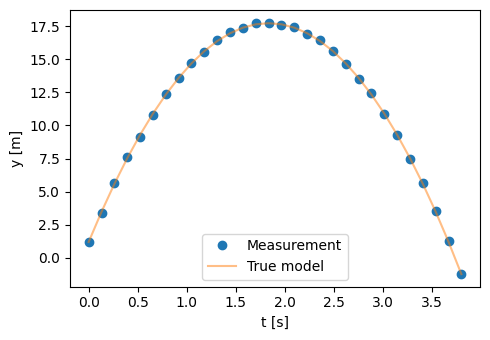

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

# ----- 1) Model and synthetic data -----
rng = np.random.default_rng(42)

# "True" parameters (unknown during fitting)
g_true  = 9.81     # m/s^2
v0_true = 18.0     # m/s
h0_true = 1.2      # m

def height_model(t, g, v0, h0):
    return h0 + v0*t - 0.5*g*t**2

# Measurement times
t = np.linspace(0.0, 3.8, 30)

# Measurement noise
sigma_y = 0.10
y_clean = height_model(t, g_true, v0_true, h0_true)
y = y_clean + rng.normal(0.0, sigma_y, size=t.size)

# Plot measurements vs. true model
plt.figure(figsize=(5,3.5))
plt.plot(t, y, "o", label="Measurement")
plt.plot(t, y_clean, "-", alpha=0.5, label="True model")
plt.xlabel("t [s]"); plt.ylabel("y [m]"); plt.legend(); plt.tight_layout()
plt.show()


#### התאמת עקומה והערכת אי־ודאות (`optimize.curve_fit`)  
נתאים את $g, v_0, h_0$ ע"י מיזעור ריבועי השאריות. נזין את $\sigma_y$ ונסמן `absolute_sigma=True` כדי שמטריצת ה־covariance תחושב ביחידות פיזיות נכונות. שגיאות $1\sigma$ הן השורש הריבועי של האיברים על האלכסון.


curve_fit results:
g   = 9.811 ± 0.032 m/s^2
v0  = 18.015 ± 0.063 m/s
h0  = 1.176 ± 0.051 m


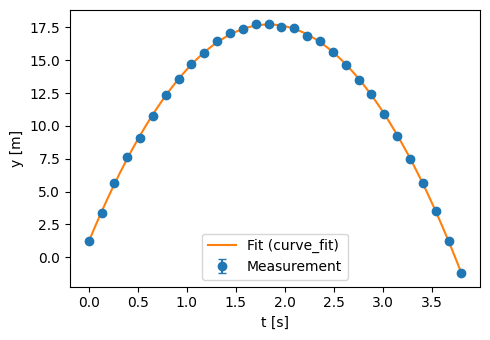

In [20]:
# ----- 2) curve_fit: non-linear fit -----
p0 = (8.0, 10.0, 0.0)  # Initial guess: (g, v0, h0)

popt, pcov = opt.curve_fit(
    f=height_model, xdata=t, ydata=y, p0=p0,
    sigma=np.full_like(t, sigma_y), absolute_sigma=True
)
g_fit, v0_fit, h0_fit = popt
perr = np.sqrt(np.diag(pcov))  # 1σ uncertainty per parameter

print("curve_fit results:")
print(f"g   = {g_fit:.3f} ± {perr[0]:.3f} m/s^2")
print(f"v0  = {v0_fit:.3f} ± {perr[1]:.3f} m/s")
print(f"h0  = {h0_fit:.3f} ± {perr[2]:.3f} m")

# Plot fitted curve
t_dense = np.linspace(t.min(), t.max(), 300)
y_fit = height_model(t_dense, *popt)

plt.figure(figsize=(5,3.5))
plt.errorbar(t, y, yerr=sigma_y, fmt="o", label="Measurement", capsize=3)
plt.plot(t_dense, y_fit, label="Fit (curve_fit)")
plt.xlabel("t [s]"); plt.ylabel("y [m]"); plt.legend(); plt.tight_layout()
plt.show()


#### מציאת שורש: זמן הפגיעה בקרקע (`optimize.root_scalar`)  
נרצה $t_\text{impact}$ כך ש־$y(t)=0$. נשתמש בפרמטרים המותאמים ונפתור $h_0 + v_0 t - \tfrac{1}{2} g t^2 = 0$.  
שיטה בטוחה: **Brent** עם מסגרת `[a,b]` שבה הפונקציה מחליפה סימן. אפשר גם **Newton** אם יש נגזרת טובה וניחוש קרוב.

In [21]:
# ----- 3) root_scalar: find t where y(t)=0 -----
def height_fit_only_t(t):
    return height_model(t, g_fit, v0_fit, h0_fit)

# (a) Brent: requires bracket with sign change
sol_brent = opt.root_scalar(height_fit_only_t, bracket=[0.0, 5.0], method='brentq')
t_impact_brent = sol_brent.root

# (b) Newton: requires derivative and initial guess
def dheight_dt(t):
    return v0_fit - g_fit*t

sol_newton = opt.root_scalar(height_fit_only_t, fprime=dheight_dt, x0=3.0, method='newton')
t_impact_newton = sol_newton.root

print(f"t_impact (Brent)  = {t_impact_brent:.4f} s")
print(f"t_impact (Newton) = {t_impact_newton:.4f} s")


t_impact (Brent)  = 3.7365 s
t_impact (Newton) = 3.7365 s


#### חיפוש מינימום חד־ממדי: זמן הגובה המירבי (`optimize.minimize_scalar`)  
הגובה מקסימלי כש־$\tfrac{d y}{dt}=0$. במקום לפתור שורש לנגזרת, נוכל למזער את $-y(t)$ על תחום פיזיקלי סביר.


In [22]:
# ----- 4) minimize_scalar: find time of max height -----
res_min1d = opt.minimize_scalar(
    lambda tt: -height_fit_only_t(tt),
    bounds=(0.0, 5.0), method='bounded'
)
t_peak = res_min1d.x
y_peak = height_fit_only_t(t_peak)

print(f"t_peak ≈ {t_peak:.4f} s,  y_peak ≈ {y_peak:.3f} m")

# Alternative via derivative root:
sol_dydt0 = opt.root_scalar(lambda tt: v0_fit - g_fit*tt, bracket=[0.0, 5.0], method='brentq')
print(f"t_peak via dy/dt=0: {sol_dydt0.root:.4f} s")


t_peak ≈ 1.8362 s,  y_peak ≈ 17.715 m
t_peak via dy/dt=0: 1.8362 s


#### מינימיזציה רב־ממדית: כי־בריבוע ידני (`optimize.minimize`)  
כאן נבנה פונקציית עלות $\chi^2(g,v_0,h_0)$ ונמזער אותה ישירות. זה מדגים שימוש ב־`minimize` כחלופה כללית ל־`curve_fit`.


In [23]:
# ----- 5) minimize (multi-dimensional) chi^2 -----
def chi2(params):
    g, v0, h0 = params
    y_model = height_model(t, g, v0, h0)
    r = (y - y_model) / sigma_y
    return np.sum(r*r)

x0 = np.array([8.0, 10.0, 0.0])  # Initial guess
bounds = [(0.0, 30.0), (-100.0, 100.0), (-10.0, 10.0)]  # Reasonable bounds

res = opt.minimize(chi2, x0=x0, bounds=bounds, method="L-BFGS-B")
g_m, v0_m, h0_m = res.x

print("minimize results (chi^2):")
print(f"g   = {g_m:.3f}, v0 = {v0_m:.3f}, h0 = {h0_m:.3f}, chi2 = {res.fun:.2f}")


minimize results (chi^2):
g   = 9.811, v0 = 18.015, h0 = 1.176, chi2 = 16.88


#### תרגום אי־ודאות לזמן הפגיעה  
ברשותנו $ \mathrm{Cov}(\mathbf{p}) $ עבור $\mathbf{p}=(g,v_0,h_0)$. אי־הוודאות של $t_\text{impact}$ ניתנת בקירוב ע"י:

$$
\sigma_{t} \approx \frac{\sqrt{\mathbf{J}_p \, \mathrm{Cov}(\mathbf{p}) \, \mathbf{J}_p^\top}}{\left| \frac{\partial y}{\partial t}(t_\text{impact}) \right|}
$$

כאשר $\mathbf{J}_p = \left[\tfrac{\partial y}{\partial g}, \tfrac{\partial y}{\partial v_0}, \tfrac{\partial y}{\partial h_0}\right]$ מוערכת בנקודת $t_\text{impact}$.


In [24]:
# ----- 6) Propagate parameter covariance to impact time -----
t_star = t_impact_brent

Jp = np.array([
    -0.5 * t_star**2,   # d y / d g
     t_star,            # d y / d v0
     1.0                # d y / d h0
]).reshape(1, -1)

num = Jp @ pcov @ Jp.T
den = abs(v0_fit - g_fit*t_star)  # |dy/dt| at impact
sigma_t = float(np.sqrt(num) / den)

print(f"t_impact = {t_star:.4f} ± {sigma_t:.4f} s  (≈1σ)")


t_impact = 3.7365 ± 0.0026 s  (≈1σ)


/tmp/ipykernel_28894/4176238823.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_t = float(np.sqrt(num) / den)


### סיכום   
- **התאמה (`curve_fit`)** מספקת פרמטרים מיטביים ו־**covariance** להערכת אי־ודאות פיזיקלית.  
- **שורשים (`root_scalar`)** מתאימים לחישוב נקודות זמן/מיקום של אירוע (כמו $y=0$).  
- **מינימום חד־ממדי (`minimize_scalar`)** שימושי למציאת רגעי קיצון או נקודות אופטימליות.  
- **מינימום רב־ממדי (`minimize`)** נותן גמישות מלאה בהגדרת פונקציית עלות ואילוצים.  

טיפי עבודה: הקפידו על סולמות גודל טובים, מסגרות (`bracket`) לשורשים/מינימום, וניחושי פתיחה הגיוניים. עבור התאמות, ספקו `sigma` אמינה ו־`absolute_sigma=True` כדי לקבל שגיאות בפרמטרים ביחידות הנכונות.


In [25]:
import json
from jupyterquiz import display_quiz
from IPython.display import Javascript, display

quiz_json = r'''
[
  {
    "question": "איזו שיטה ב-<code>optimize.root_scalar</code> מתאימה במיוחד כשידוע תחום שבו הפונקציה מחליפה סימן (למשל בין 0 ל-5)?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>method='brentq'</code> עם <code>bracket=(0,5)</code>",
        "correct": true,
        "feedback": "נכון! Brent (בגרסת brentq) דורש מסגרת עם החלפת סימן ומספק התכנסות אמינה."
      },
      {
        "answer": "<code>method='newton'</code> עם <code>x0=2.5</code> ללא נגזרת",
        "correct": false,
        "feedback": "לא מדויק — ניוטון רגיש לניחוש התחלתי ולרוב דורש נגזרת כדי להיות יציב ומהיר."
      },
      {
        "answer": "<code>method='secant'</code> ללא מסגרת וללא נגזרת",
        "correct": false,
        "feedback": "לא נכון — שיטת הסקנט יכולה לעבוד, אך ללא מסגרת היא פחות אמינה מה-Brent כשיש החלפת סימן."
      },
      {
        "answer": "<code>fsolve</code> עם <code>x0=2.5</code>",
        "correct": false,
        "feedback": "לא נכון — <code>fsolve</code> מיועד לבעיות רב-ממד/וקטוריות ומתבסס על ניוטון; כאן עדיף <code>root_scalar</code> עם מסגרת."
      }
    ]
  },
  {
    "question": "ברצונך למזער פונקציה חד-ממדית $f(t)$ בתחום הקשור בגבולות: $0 \\le t \\le 5$. איזו קריאה מתאימה?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>optimize.minimize_scalar(f, bounds=(0,5), method='bounded')</code>",
        "correct": true,
        "feedback": "נכון! השיטה <code>bounded</code> ב-<code>minimize_scalar</code> מתאימה למינימיזציה עם גבולות סופיים."
      },
      {
        "answer": "<code>optimize.minimize_scalar(f, bracket=(0,5))</code>",
        "correct": false,
        "feedback": "לא מדויק — <code>bracket</code> נותן תחום חיפוש אבל לא מכריח גבולות; לחיוב גבולות השתמש ב-<code>method='bounded'</code>."
      },
      {
        "answer": "<code>optimize.minimize(f, x0=2.5)</code>",
        "correct": false,
        "feedback": "לא נכון — <code>minimize</code> הוא לכלים רב-ממדיים; לחד-ממדי עם גבולות עדיף <code>minimize_scalar</code> עם <code>bounded</code>."
      },
      {
        "answer": "<code>optimize.curve_fit(f, t, y)</code>",
        "correct": false,
        "feedback": "לא נכון — <code>curve_fit</code> מיועד להתאמת פרמטרים למודל לנתונים, לא למינימיזציה כללית על ציר יחיד."
      }
    ]
  },
  {
    "question": "בהתאמה של מודל ליניארי $y = a x + b$ עם <code>optimize.curve_fit</code>, כיצד כדאי לפעול כדי שהשגיאות $1\\sigma$ על $a,b$ (מהאלכסון של מטריצת ה-covariance) יהיו ביחידות פיזיקליות נכונות?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "להעביר וקטור <code>sigma</code> עם סטיות התקן של המדידות ולציין <code>absolute_sigma=True</code>",
        "correct": true,
        "feedback": "נכון! אז ה-covariance מחושב בסקאלה פיזיקלית; השגיאות הן $\\sqrt{\\mathrm{diag}(\\mathrm{Cov})}$."
      },
      {
        "answer": "להגדיל את <code>maxfev</code> כדי שההתאמה תתכנס טוב יותר",
        "correct": false,
        "feedback": "לא מספיק — זה עשוי לעזור להתכנסות אך לא קובע את סקלת ה-covariance ביחידות פיזיקליות."
      },
      {
        "answer": "לנרמל את $x,y$ לטווח [0,1] לפני התאמה",
        "correct": false,
        "feedback": "נירמול יכול לעזור נומרית, אך אינו מחליף <code>sigma</code> ו-<code>absolute_sigma=True</code> לצורך פירוש שגיאות."
      },
      {
        "answer": "להשתמש ב-<code>p0</code> קרוב לערכים האמיתיים",
        "correct": false,
        "feedback": "ניחוש התחלתי טוב מסייע, אך אינו מבטיח ש-covariance יתוקנן פיזיקלית ללא <code>sigma</code> ו-<code>absolute_sigma=True</code>."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)

display(Javascript("""
(() => {
  if (window.MathJax) {
    if (MathJax.typesetPromise) { MathJax.typesetPromise(); }
    else if (MathJax.Hub && MathJax.Hub.Queue) { MathJax.Hub.Queue(['Typeset', MathJax.Hub]); }
  }
})();
"""))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. אינטרפולציה והחלקה
**אינטרפולציה חד־ממדית:** `interpolate.interp1d(x, y, kind='linear'|'cubic'|...)` — קירוב ערכים בין נקודות מדידה.  
**Spline**: `UnivariateSpline` מאפשר החלקה (smoothing) באמצעות פרמטר $s$.



In [26]:
# %%
# Interpolation demo
x = np.linspace(0, 10, 11)
y = np.sin(x) + 0.1*np.cos(3*x)
f_lin = interpolate.interp1d(x, y, kind="linear")
f_cub = interpolate.interp1d(x, y, kind="cubic")

xf = np.linspace(0, 10, 400)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y, "o", label="samples")
ax.plot(xf, f_lin(xf), label="linear")
ax.plot(xf, f_cub(xf), label="cubic")
ax.set_title("Interpolation: linear vs cubic")
ax.legend()
plt.show()


NameError: name 'interpolate' is not defined

In [ ]:
# %%
# Spline smoothing demo
x = np.linspace(0, 10, 80)
rng = np.random.default_rng(1)
y = np.sin(x) + 0.4*rng.normal(size=x.size)

spline = interpolate.UnivariateSpline(x, y, s=5.0)  # smoothing parameter
xf = np.linspace(0, 10, 400)

fig, ax = plt.subplots()
ax.plot(x, y, ".", label="noisy samples")
ax.plot(xf, spline(xf), "-", label="smoothed spline")
ax.set_title("Smoothing with UnivariateSpline")
ax.legend()
plt.show()
    

## 5. עיבוד אותות ו-FFT
**FFT חד־צדדי:** `fft.rfft` לאותים ממשיים; תדירויות ב־`fft.rfftfreq(N, d=1/fs)`.  
**נייקוויסט:** $f_N = \tfrac{f_s}{2}$.  
**החלקה בסיסית:** `signal.savgol_filter`.  
**איתור פסגות:** `signal.find_peaks`.

ננתח אות סינוס מרובע תדרים ועם רעש, נזהה פסגות תדר.


In [ ]:
# %%
# Signal + FFT + peak finding
fs = 500.0  # Hz
T = 2.0     # seconds
t = np.arange(0, T, 1/fs)
rng = np.random.default_rng(2)
sig = 0.7*np.sin(2*np.pi*50*t) + 0.3*np.sin(2*np.pi*120*t) + 0.2*rng.normal(size=t.size)

# FFT
yf = fft.rfft(sig)
ff = fft.rfftfreq(t.size, d=1/fs)
amp = np.abs(yf)/t.size

# Smooth time signal (optional)
sig_smooth = signal.savgol_filter(sig, window_length=51, polyorder=3)

# Peak detection on spectrum
peaks, _ = signal.find_peaks(amp, height=np.max(amp)*0.3)

fig1, ax1 = plt.subplots()
ax1.plot(t, sig, label="signal")
ax1.plot(t, sig_smooth, label="smoothed")
ax1.set_title("Time signal")
ax1.set_xlabel("t (s)")
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(ff, amp, label="spectrum")
ax2.plot(ff[peaks], amp[peaks], "x", label="peaks")
ax2.set_xlim(0, 200)
ax2.set_xlabel("f (Hz)")
ax2.set_ylabel("Amplitude")
ax2.set_title("Amplitude spectrum")
ax2.legend()
plt.show()


### שאלות רב־ברירה
1. תדירות נייקוויסט היא:  
   A. $f_s$  
   B. $2f_s$  
   C. $f_s/2$  
   D. $1/f_s$  
2. איזו פונקציה מתאימה לאיתור פסגות בספקטרום?  
   A. `fft.rfft`  
   B. `signal.find_peaks`  
   C. `integrate.quad`  
   D. `stats.linregress`

### איור (סקיצה)
- גרף סכמטי של דגימה בזמן וייצוגה בתחום התדר (FFT).


## דוגמאות מסכמות (Capstone)

## דוגמה 1 — מטוטלת: הערכת $g$ מהתלות $T(L)$
**רקע:** עבור זוויות קטנות, תקופת מטוטלת מאורך $L$ היא בקירוב $ T(L) \approx 2\pi\sqrt{\tfrac{L}{g}} $.  
**מטרה:** בהתבסס על מדידות $(L_i, T_i)$ עם אי־ודאות, נאמוד את $g$ בעזרת התאמה לא־ליניארית, נציג פסי שגיאה, ונבחן שיוריים.

שלבים:  
1. יצירת/טעינת נתוני ניסוי עם רעש.  
2. התאמה עם `curve_fit` למודל $T(L)=a\sqrt{L}$ כאשר $a\approx 2\pi/\sqrt{g}$ או ישירות פרמטר $g$.  
3. פסי שגיאה, שיוריים, וטווחי ביטחון.



In [ ]:
# %%
# Pendulum: estimate g from T(L)
rng = np.random.default_rng(0)
g_true = 9.81

# Synthetic measurements
L = np.linspace(0.2, 1.2, 10)          # meters
T_true = 2*np.pi*np.sqrt(L/g_true)
sigma_T = 0.02 + 0.01*np.sqrt(L)       # simple nonuniform uncertainty
T_meas = T_true + rng.normal(0, sigma_T)

def T_model(L, g):
    return 2*np.pi*np.sqrt(L/g)

popt, pcov = optimize.curve_fit(T_model, L, T_meas, sigma=sigma_T, absolute_sigma=True, p0=[9.5])
g_hat = popt[0]
g_err = np.sqrt(np.diag(pcov))[0]

# Residuals
res = T_meas - T_model(L, g_hat)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6), constrained_layout=True)
axs[0].errorbar(L, T_meas, yerr=sigma_T, fmt="o", label="measurements")
L_f = np.linspace(L.min(), L.max(), 300)
axs[0].plot(L_f, T_model(L_f, g_hat), label=rf"fit: $g={g_hat:.3f}\pm{g_err:.3f}\ \mathrm{{m/s^2}}$")
axs[0].set_xlabel("L (m)")
axs[0].set_ylabel("T (s)")
axs[0].set_title("Pendulum period vs length")
axs[0].legend()

axs[1].axhline(0, color="k", linewidth=1)
axs[1].plot(L, res, "o-")
axs[1].set_xlabel("L (m)")
axs[1].set_ylabel("Residual (s)")
axs[1].set_title("Residuals")
plt.show()


# %% [markdown]
### שאלות רב־ברירה (דוגמה 1)
1. אם $T=a\sqrt{L}$, אז $a$ קשור ל־$g$ כך ש:  
   A. $a = \dfrac{1}{2\pi}\sqrt{g}$  
   B. $a = 2\pi\sqrt{g}$  
   C. $a = \dfrac{2\pi}{\sqrt{g}}$  
   D. $a = g$  
2. מה תפקיד וקטור `sigma` ב־`curve_fit`?  
   A. לקבוע צבעים בגרף  
   B. להגדיר משקלות להתאמה בהתאם לאי־ודאות  
   C. להאיץ את החישוב  
   D. להחליף את הפונקציה למודל

### איור (סקיצה)
- סכמת ניסוי מטוטלת: נקודת תלייה, חוט באורך $L$, סטייה קטנה, מדידת תקופה.


# %% [markdown]
## דוגמה 2 — קליע עם גרר ריבועי: זווית שיגור מיטבית
**רקע:** כוח גרר ריבועי: $ \mathbf{F}_d = -\tfrac{1}{2}\rho C_d A v \mathbf{v} $.  
שקול ל־ODE דו־ממדי עבור $(x,y)$ עם מהירויות $(v_x,v_y)$:  
\[
\begin{aligned}
\dot{x}&=v_x,\quad \dot{y}=v_y,\\
\dot{v}_x&=-\frac{\rho C_d A}{2m}\,v\,v_x,\quad
\dot{v}_y=-g-\frac{\rho C_d A}{2m}\,v\,v_y,
\end{aligned}
\]
כאשר $v=\sqrt{v_x^2+v_y^2}$.

**מטרה:** לפתור את ה־ODE עד פגיעה בקרקע (אירוע אפס ב־$y$), ולמצוא ע"י `minimize_scalar` את הזווית $\theta$ שממקסמת את הטווח האופקי.


In [ ]:
# %%
# Projectile with quadratic drag: optimal launch angle
g = 9.81
rho = 1.225     # air density (kg/m^3)
CdA = 0.05      # drag coefficient * area (m^2)
m = 0.145       # mass (kg) ~ baseball
v0 = 40.0       # m/s

def flight(theta_deg):
    # ODE system with quadratic drag
    theta = np.deg2rad(theta_deg)
    vx0 = v0*np.cos(theta)
    vy0 = v0*np.sin(theta)

    def ode(t, y):
        # y=[x, y, vx, vy]
        x, y_, vx, vy = y
        v = np.hypot(vx, vy)
        ax = -(rho*CdA/(2*m))*v*vx
        ay = -g -(rho*CdA/(2*m))*v*vy
        return [vx, vy, ax, ay]

    def hit_ground(t, y):
        return y[1]  # event when y=0
    hit_ground.terminal = True
    hit_ground.direction = -1

    sol = integrate.solve_ivp(ode, (0, 10), [0, 0, vx0, vy0],
                              events=hit_ground, max_step=0.02, rtol=1e-7, atol=1e-9)
    x, y = sol.y[0], sol.y[1]
    t = sol.t
    return t, x, y

def range_for_angle(theta_deg):
    t, x, y = flight(theta_deg)
    return x[-1]

# Optimize angle to maximize range (negative for minimize_scalar)
obj = lambda th: -range_for_angle(th)
res = optimize.minimize_scalar(obj, bounds=(5, 85), method="bounded")
theta_opt = res.x
R_opt = range_for_angle(theta_opt)

# Plot a few trajectories around optimum
angles = [theta_opt-10, theta_opt, theta_opt+10]
fig, ax = plt.subplots()
for th in angles:
    _, x, y = flight(th)
    ax.plot(x, y, label=rf"$\theta={th:.1f}^\circ$")

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title(rf"Trajectories with quadratic drag (optimal θ ≈ {theta_opt:.1f}°, range ≈ {R_opt:.1f} m)")
ax.legend()
plt.show()

# Range vs angle curve
ths = np.linspace(10, 80, 25)
ranges = np.array([range_for_angle(th) for th in ths])

fig, ax = plt.subplots()
ax.plot(ths, ranges, "-o")
ax.axvline(theta_opt, linestyle="--")
ax.set_xlabel(r"$\theta$ (deg)")
ax.set_ylabel("Range (m)")
ax.set_title("Range vs launch angle (with drag)")
plt.show()


# %% [markdown]
### שאלות רב־ברירה (דוגמה 2)
1. לשם עצירת ה־ODE בעת פגיעה בקרקע ($y=0$), השתמשנו ב־  
   A. `events` עם פונקציה שמחזירה $y$  
   B. `curve_fit`  
   C. `root_scalar`  
   D. `stats.norm`  
2. ללא גרר, הזווית המיטבית היא:  
   A. $90^\circ$  
   B. $0^\circ$  
   C. $45^\circ$  
   D. תלוי ב־$v_0$ בלבד

### איור (סקיצה)
- שרטטו כוחות על הקליע: משקל כלפי מטה וגרר ביחס ישר למהירות ובכיוון מנוגד.


# %% [markdown]
## דוגמה 3 — מתנד מרוסן: זיהוי $\omega_n$ ו־$\zeta$
**רקע:** משוואה: $x'' + 2\zeta\omega_n x' + \omega_n^2 x = 0$  
במקרה מרוסן קל ($0<\zeta<1$): $x(t) = A e^{-\zeta\omega_n t}\cos(\omega_d t+\phi)$, עם $ \omega_d = \omega_n\sqrt{1-\zeta^2} $ ו־$ Q=\dfrac{1}{2\zeta} $.

**מטרה:**  
1. ליצור סיגנל מרוסן עם רעש.  
2. לזהות $\omega_d$ מבדיקת FFT/פסגה.  
3. להתאים את המודל המלא עם `curve_fit` כדי לאמוד $A,\zeta,\omega_n,\phi$.  
4. להציג שיוריים ולהעריך $Q$.



In [ ]:
# %%
# Damped oscillator: identify ωn and ζ
rng = np.random.default_rng(7)
zeta_true = 0.05
wn_true = 2*np.pi*5.0  # natural rad/s ~ 5 Hz
A_true, phi_true = 1.0, 0.2

fs = 200.0
T = 6.0
t = np.arange(0, T, 1/fs)

# Generate damped signal with noise
wd_true = wn_true*np.sqrt(1 - zeta_true**2)
x_clean = A_true*np.exp(-zeta_true*wn_true*t)*np.cos(wd_true*t + phi_true)
x_noisy = x_clean + 0.05*rng.normal(size=t.size)

# FFT to estimate wd (peak)
Y = fft.rfft(x_noisy)
f = fft.rfftfreq(t.size, d=1/fs)
amp = np.abs(Y)/t.size
pk, _ = signal.find_peaks(amp, height=np.max(amp)*0.3)
f_peak = f[pk[np.argmax(amp[pk])]] if pk.size else f[np.argmax(amp)]
wd_est = 2*np.pi*f_peak

# Nonlinear fit: x(t)=A*exp(-ζ*wn*t)*cos(wd*t+φ) with wd = wn*sqrt(1-ζ^2)
def damped_model(t, A, zeta, wn, phi):
    wd = wn*np.sqrt(max(1e-12, 1 - zeta**2))
    return A*np.exp(-zeta*wn*t)*np.cos(wd*t + phi)

p0 = [1.0, 0.1, wd_est, 0.0]  # rough initial guesses
bounds = ([0, 0, 0, -2*np.pi], [np.inf, 0.99, np.inf, 2*np.pi])

popt, pcov = optimize.curve_fit(damped_model, t, x_noisy, p0=p0, bounds=bounds, maxfev=20000)
A_hat, zeta_hat, wn_hat, phi_hat = popt
perr = np.sqrt(np.diag(pcov))
Q_hat = 1/(2*zeta_hat) if zeta_hat>0 else np.inf

# Plot results
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6), constrained_layout=True)
axs[0].plot(t, x_noisy, ".", ms=3, label="noisy")
axs[0].plot(t, damped_model(t, *popt), "-", label="fit")
axs[0].set_title(rf"Damped oscillator fit: $\zeta={zeta_hat:.3f}\pm{perr[1]:.3f},\ \omega_n={wn_hat:.2f}\pm{perr[2]:.2f}$")
axs[0].set_xlabel("t (s)")
axs[0].set_ylabel("x(t)")
axs[0].legend()

res = x_noisy - damped_model(t, *popt)
axs[1].axhline(0, color="k", lw=1)
axs[1].plot(t, res, "-", lw=1)
axs[1].set_title("Residuals")
axs[1].set_xlabel("t (s)")
axs[1].set_ylabel("residual")

plt.show()

# Spectrum view with detected peak
fig, ax = plt.subplots()
ax.plot(f, amp, label="spectrum")
ax.axvline(f_peak, linestyle="--", label=rf"peak ~ {f_peak:.2f} Hz")
ax.set_xlim(0, 15)
ax.set_xlabel("f (Hz)")
ax.set_ylabel("Amplitude")
ax.set_title("Amplitude spectrum and dominant peak")
ax.legend()
plt.show()

print(f"Estimated parameters:\n A={A_hat:.3f}±{perr[0]:.3f}, zeta={zeta_hat:.4f}±{perr[1]:.4f}, wn={wn_hat:.3f}±{perr[2]:.3f}, phi={phi_hat:.3f}±{perr[3]:.3f}")
print(f"Estimated Q ~ {Q_hat:.2f}")


# %% [markdown]
### שאלות רב־ברירה (דוגמה 3)
1. הקשר בין $\omega_d$ ו־$\omega_n$ הוא:  
   A. $\omega_d = \omega_n$  
   B. $\omega_d = \omega_n\sqrt{1-\zeta^2}$  
   C. $\omega_d = \zeta\omega_n$  
   D. $\omega_d = \dfrac{\omega_n}{\zeta}$  
2. גורם האיכות $Q$ למרוסן קל:  
   A. $Q=2\zeta$  
   B. $Q=\zeta^2$  
   C. $Q=\dfrac{1}{2\zeta}$  
   D. $Q=\dfrac{1}{\zeta}$

### איור (סקיצה)
- סכמת מעטפת דעיכה $A e^{-\zeta\omega_n t}$ והאוסילציה הפנימית בקצב $\omega_d$.


# %% [markdown]
# נספח קצר — טיפים לשמירת תרשימים
- לשימוש במאמרים/דוחות: עדיף **SVG/PDF** (וקטורי) עבור תרשימי קו/טקסט.  
- לגדלים מדויקים: `fig.set_size_inches(width_inches, height_inches)` או `fig, ax = plt.subplots(figsize=(w,h))`.  
- לשילוב ב-Word/Google Docs: PNG ב־300–600 DPI.  
- הוסיפו יחידות ותיאור ברור לצירים, מקרא, וכותרת עניינית.

> כאן המקום לצרף רשימת תשובות לשאלות, אם תרצו, או להשאירן ללמידה עצמית.
